# MNIST Dataset 
By: Amir Nejad, PhD.

**IN this notebook I attempt to classify MNIST data using three different methods: Logistic Regression, Keras sequential model with dense layers, and Keras convoloutional model.** 

### Load and Inspect Data

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
print('Shape training images: ',x_train.shape)
print('Shape training labels: ',y_train.shape)
print('Shape testing images: ',x_test.shape)
print('Shape testing images: ',y_test.shape)

Shape training images:  (60000, 28, 28)
Shape training labels:  (60000,)
Shape testing images:  (10000, 28, 28)
Shape testing images:  (10000,)


**We have 60,000 images in the training data and we will be testing on further 10,000 images. All images have 28 by 28 pixel resolution. In the following part of the code, we can see the typical images in this dataset.**

In [4]:
Shape_Data=x_train.shape
Shape_Data_test=x_test.shape

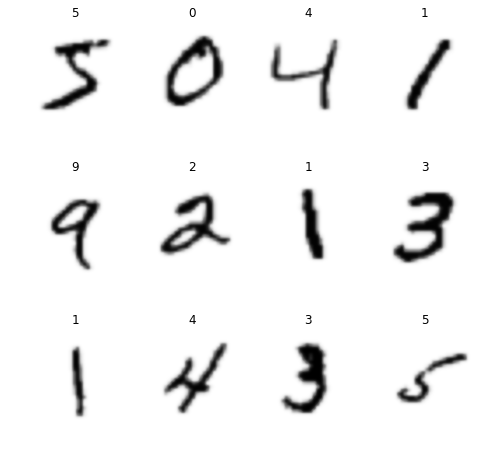

In [5]:
n_row=3;
n_col=4
_, axs = plt.subplots(n_row, n_col, figsize=(8, 8))
axs = axs.flatten()
for i in range(0,n_row*n_col):
    axs[i].imshow(x_train[i,:],interpolation ='gaussian',cmap='Greys');axs[i].axis('off');axs[i].title.set_text(y_train[i]);

# Logistic Regression

**The first model that I am going to use is Logistic Regression. Logistic regression uses sigmoid function to predict probability of the target class. We have used sklearn logistic regression with L1 and L2 penalty to train the model. L1 refers to la L1 penalty as it can be seen has 89% test score and L2 penalty has 92% test score. The default penalty for logistic regression is L2.**

### L1 Penalty

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 4 epochs took 17 seconds
Sparsity with L1 penalty: 69.72%
Test score with L1 penalty: 0.8941


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.7s finished


Example run in 17.142 s


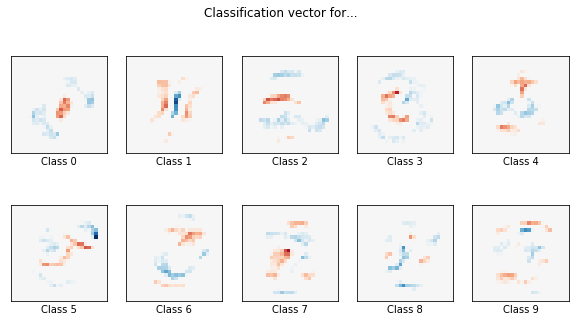

In [6]:
from sklearn.linear_model import LogisticRegression
import time
t0 = time.time()
train_samples = 5000

clf = LogisticRegression(C=50. / train_samples,
                         multi_class='multinomial',
                         penalty='l1', solver='saga', tol=0.1,verbose =1,random_state =42)
clf.fit(np.reshape(x_train,(Shape_Data[0],Shape_Data[1]*Shape_Data[2])), y_train)
sparsity = np.mean(clf.coef_ == 0) * 100
score = clf.score(np.reshape(x_test,(Shape_Data_test[0],Shape_Data_test[1]*Shape_Data_test[2])), y_test)
print("Sparsity with L1 penalty: %.2f%%" % sparsity)
print("Test score with L1 penalty: %.4f" % score)

coef = clf.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(coef[i].reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel('Class %i' % i)
plt.suptitle('Classification vector for...')

run_time = time.time() - t0
print('Example run in %.3f s' % run_time)
plt.show()

Number of incorrectly classified images (Logistic Regression):  1059


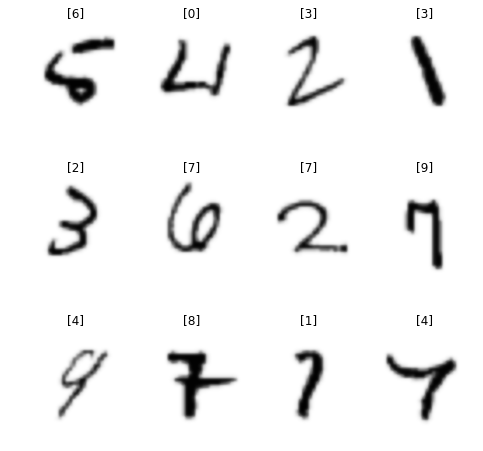

In [7]:
incorrects_logistic =np.nonzero(clf.predict(np.reshape(x_test,(Shape_Data_test[0],Shape_Data_test[1]*Shape_Data_test[2])))!= y_test)
n_row=3;
n_col=4
_, axs = plt.subplots(n_row, n_col, figsize=(8, 8))
axs = axs.flatten()
print('Number of incorrectly classified images (Logistic Regression): ',len(incorrects_logistic[0]))
for i in range(0,n_row*n_col):
    axs[i].imshow(x_test[incorrects_logistic[0][i]],interpolation ='gaussian',cmap='Greys');axs[i].axis('off');
    axs[i].title.set_text(clf.predict(np.reshape(x_test[incorrects_logistic[0][i]],(1,Shape_Data_test[1]*Shape_Data_test[2]))))

### L2 Penalty

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 3 epochs took 7 seconds
Sparsity with L1 penalty: 8.67%
Test score with L1 penalty: 0.9211


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.0s finished


Example run in 6.482 s


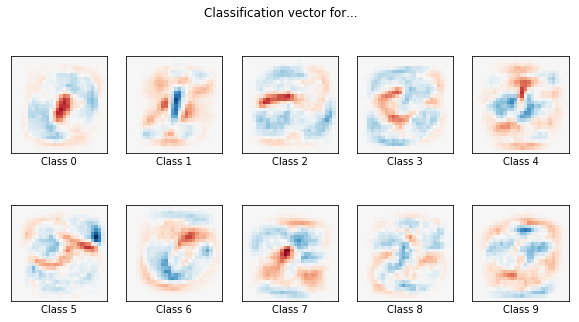

In [18]:
from sklearn.linear_model import LogisticRegression
import time
t0 = time.time()
train_samples = 5000

clf2 = LogisticRegression(C=50. / train_samples,
                         multi_class='multinomial',
                         penalty='l2', solver='saga', tol=0.1,verbose =1,random_state =42)
clf2.fit(np.reshape(x_train,(Shape_Data[0],Shape_Data[1]*Shape_Data[2])), y_train)
sparsity = np.mean(clf2.coef_ == 0) * 100
score = clf2.score(np.reshape(x_test,(Shape_Data_test[0],Shape_Data_test[1]*Shape_Data_test[2])), y_test)
print("Sparsity with L1 penalty: %.2f%%" % sparsity)
print("Test score with L1 penalty: %.4f" % score)

coef = clf2.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(coef[i].reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel('Class %i' % i)
plt.suptitle('Classification vector for...')

run_time = time.time() - t0
print('Example run in %.3f s' % run_time)
plt.show()

Number of incorrectly classified images (Logistic Regression):  789


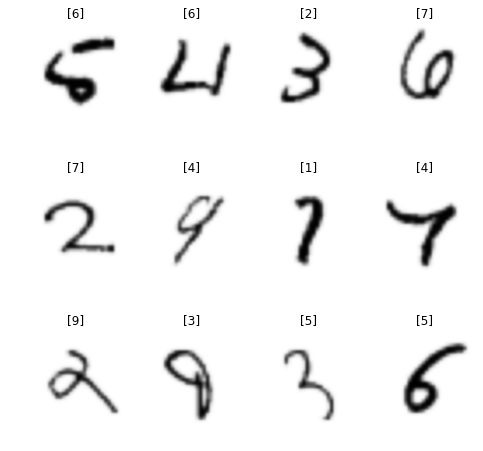

In [19]:
incorrects_logistic =np.nonzero(clf2.predict(np.reshape(x_test,(Shape_Data_test[0],Shape_Data_test[1]*Shape_Data_test[2])))!= y_test)
n_row=3;
n_col=4
_, axs = plt.subplots(n_row, n_col, figsize=(8, 8))
axs = axs.flatten()
print('Number of incorrectly classified images (Logistic Regression): ',len(incorrects_logistic[0]))
for i in range(0,n_row*n_col):
    axs[i].imshow(x_test[incorrects_logistic[0][i]],interpolation ='gaussian',cmap='Greys');axs[i].axis('off');
    axs[i].title.set_text(clf2.predict(np.reshape(x_test[incorrects_logistic[0][i]],(1,Shape_Data_test[1]*Shape_Data_test[2]))))

**Keras sequential model with dense layers used to classify the data. In the following part of the code I defined a sequential model (Keras model that sequentially can put together line by line) with the first layer attempts to flatten the data (flatten means change the shape of images from 2D to 1D. for example images in MNIST dataset have 28 by 28 size. Flatten will produce number of images * 784 matrix). Then a dense layer with 20% dropout rate is followed by final layer of a dense layer which has output size of 10 representing 10 classes in the images. Note than the first dense layer has relu activation function but the final layer (output layer) has softmax activation function which corresponds to probability of prediction of classes.**      

# Keras Sequential Dense Layers

In [8]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])


model.compile(optimizer='adam',
              loss='sparse_categoricalrossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Epoch 1/5
60000/60000 [==============================] - 7s 114us/sample - loss: 0.2185 - acc: 0.9354
Epoch 2/5
60000/60000 [==============================] - 7s 109us/sample - loss: 0.0966 - acc: 0.9704
Epoch 3/5
60000/60000 [==============================] - 6s 107us/sample - loss: 0.0676 - acc: 0.9783
Epoch 4/5
60000/60000 [==============================] - 6s 107us/sample - loss: 0.0539 - acc: 0.9827
Epoch 5/5
10000/10000 [==============================] - 0s 46us/sample - loss: 0.0753 - acc: 0.9760


[0.07533208550779381, 0.976]

Number of incorrectly classified images (Sequential):  240


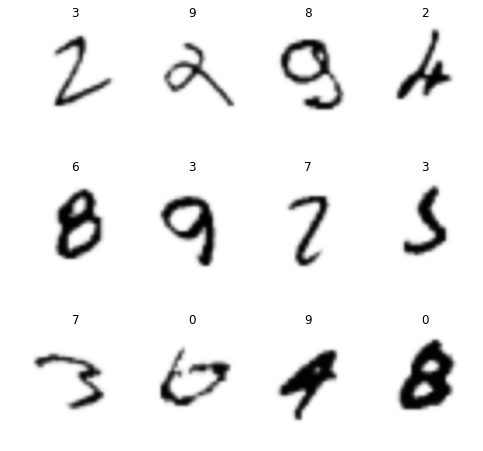

In [9]:
n_row=3;
n_col=4
_, axs = plt.subplots(n_row, n_col, figsize=(8, 8))
axs = axs.flatten()
incorrects =np.nonzero(np.argmax(model.predict(x_test),axis=1)!= y_test)
print('Number of incorrectly classified images (Sequential): ',len(incorrects[0]))
for i in range(0,n_row*n_col):
    axs[i].imshow(x_test[incorrects[0][i]],interpolation ='gaussian',cmap='Greys');axs[i].axis('off');
    axs[i].title.set_text(np.argmax(model.predict(x_test[incorrects[0][i]].reshape(1,28,28))));

**Convolutional neural networks are designed for image classification and in general data with spatial patterns. In this example first I have defined a sequential model then used convolutional layer with Kernel size of 3 by 3. This layer is then followed by multiple  layers of maxpooling, and dense layers. The final model has softmax activation function. Keras CNN model has slightly higher score than sequential linear layer (0.983 compared to 0.976).** 

# Keras CNN

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

Using TensorFlow backend.


In [11]:
input_shape = (28, 28, 1)
model_cnn = Sequential()
model_cnn.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Flatten()) 
model_cnn.add(Dense(128, activation=tf.nn.relu))
model_cnn.add(Dropout(0.2))
model_cnn.add(Dense(10,activation=tf.nn.softmax))

In [12]:
model_cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 28)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4732)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               605824    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
_________________________________________________________________


In [13]:
model_cnn.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model_cnn.fit(x=x_train.reshape(x_train.shape[0], 28, 28, 1),y=y_train, epochs=5)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 17s 289us/step - loss: 0.2171 - acc: 0.9344
Epoch 2/5
60000/60000 [==============================] - 17s 281us/step - loss: 0.0882 - acc: 0.9723
Epoch 3/5
60000/60000 [==============================] - 17s 279us/step - loss: 0.0618 - acc: 0.9805
Epoch 4/5
60000/60000 [==============================] - 17s 278us/step - loss: 0.0473 - acc: 0.9847
Epoch 5/5
60000/60000 [==============================] - 17s 278us/step - loss: 0.0363 - acc: 0.9876


In [14]:
model_cnn.evaluate(x_test.reshape(x_test.shape[0], 28, 28, 1), y_test)

10000/10000 [==============================] - 1s 124us/step


[0.05569416948656872, 0.9838]

Number of incorrectly classified images (CNN):  162


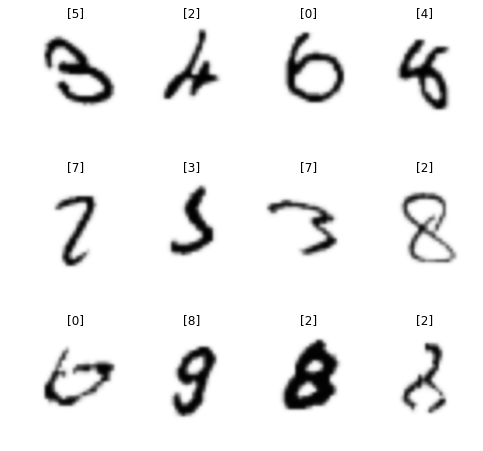

In [15]:
n_row=3;
n_col=4
_, axs = plt.subplots(n_row, n_col, figsize=(8, 8))
axs = axs.flatten()
incorrects_cnn =np.nonzero(np.argmax(model_cnn.predict(x_test.reshape(x_test.shape[0], 28, 28, 1)),axis=1)!= y_test)
print('Number of incorrectly classified images (CNN): ',len(incorrects_cnn[0]))
for i in range(0,n_row*n_col):
    axs[i].imshow(x_test[incorrects_cnn[0][i]],interpolation ='gaussian',cmap='Greys');axs[i].axis('off');
    axs[i].title.set_text(np.argmax(model_cnn.predict(x_test[incorrects_cnn[0][i]].reshape(1, 28, 28, 1)),axis=1));

Refrences
* https://scikit-learn.org/stable/auto_examples/linear_model/plot_sparse_logistic_regression_mnist.html
* https://www.tensorflow.org/tutorials
* https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d